In [43]:
import pandas as pd

AMWI = pd.read_csv(r'C:\Users\jonat\OneDrive\Documents\Diss\AMWI_LS.csv',sep=',', on_bad_lines='skip')
AMWI.rename(columns={'system:time_start':'Date'}, inplace=True)
AMWI['Date'] = pd.to_datetime(AMWI['Date'])
AMWI = AMWI.set_index('Date')

AMWI

,Horlivka1,Horlivka2,Illinka,Zolote,Bokovo-Platove,Ivanopillya,Molochnyy,Horlivka3,Zemlyanky,NEDonetsk,...,geometry14,geometry15,geometry16,geometry17,geometry18,geometry19,control1 (W),control2(W),control3(W),control4(W)
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-25,-0.017,0.013,0.008,0.041,0.121,NaN,0.061,-0.003,NaN,NaN,...,NaN,NaN,0.034,0.044,0.056,0.083,0.009,NaN,0.016,0.144
2014-05-18,0.002,0.023,0.023,0.041,NaN,0.106,0.061,0.009,0.019,0.095,...,NaN,NaN,0.035,0.050,0.064,0.084,0.027,NaN,0.028,NaN
2014-07-30,-0.013,0.027,0.016,NaN,0.140,NaN,0.075,-0.001,0.019,0.091,...,0.047,NaN,0.054,0.051,NaN,0.090,0.043,NaN,0.036,0.097
2014-08-15,-0.012,0.019,0.016,0.155,0.121,NaN,0.071,0.002,NaN,NaN,...,NaN,NaN,0.057,0.043,NaN,0.089,0.055,NaN,0.038,0.072
2014-08-15,-0.011,0.011,0.019,NaN,0.121,NaN,0.071,0.012,0.022,0.098,...,0.039,0.050,0.058,0.043,NaN,0.086,0.046,NaN,0.042,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065,0.059,...,0.026,0.047,NaN,NaN,NaN,NaN,NaN,0.042,NaN,NaN
2022-05-08,0.127,0.154,0.023,0.059,NaN,0.086,0.092,0.079,0.082,0.083,...,NaN,NaN,0.023,0.028,0.029,0.205,0.092,NaN,0.135,NaN
2022-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080,0.083,...,0.022,0.027,NaN,NaN,NaN,NaN,NaN,0.033,NaN,NaN


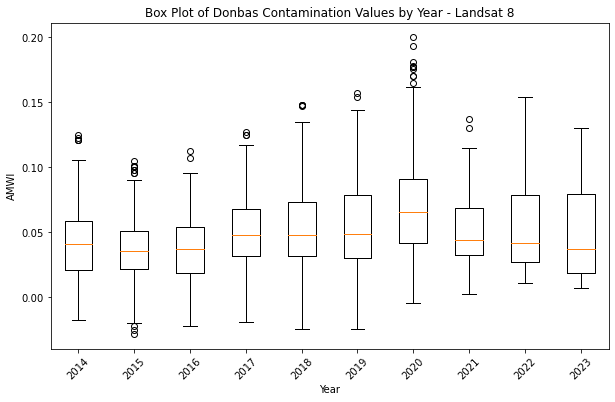

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to a datetime format
AMWI.index = pd.to_datetime(AMWI.index)

# Extract year from the index
AMWI['Year'] = AMWI.index.year

# Melt the DataFrame to convert columns into a single 'Water Body' column
melted_amwi = AMWI.melt(id_vars=['Year'], value_vars=AMWI.columns.drop('Year'))

# Create box and whisker plot using Matplotlib after removing outliers
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Box Plot of Donbas Contamination Values by Year - Landsat 8')
plt.xlabel('Year')
plt.ylabel('AMWI')

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(values, iqr_factor=1.5):
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_factor * iqr
    upper_bound = q3 + iqr_factor * iqr
    return values[(values >= lower_bound) & (values <= upper_bound)]

# Group by Year, remove outliers, and plot the data
plt.boxplot([remove_outliers_iqr(group['value'].dropna()) for year, group in melted_amwi.groupby('Year')],
            labels=melted_amwi['Year'].unique())

plt.show()




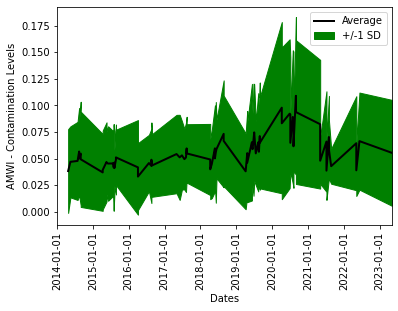

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming AMWI is your DataFrame with dates as index

# Convert the index to datetime objects
AMWI.index = pd.to_datetime(AMWI.index)

# Select a random sample of 10 columns from AMWI
sample_columns = AMWI.sample(n=10, axis=1)

# Calculate the average and standard deviation for the sample columns
average = AMWI.mean(axis=1)
std_dev = AMWI.std(axis=1)
average2 = AMWI.mean(axis=1)

# Plot each column in the sample
#for column in sample_columns.columns:
    #plt.plot(AMWI.index, sample_columns[column], label=column)

plt.plot(AMWI.index, average, label='Average', linewidth=2, color='black')
# plot average water line
# plt.plot(df_control.index, average2, '--', label='Average', alpha=0.7, linewidth=8, color='blue')

# Create a stacked plot for the average and standard deviation
plt.fill_between(AMWI.index, average + 1 * std_dev, average - 1 * std_dev, label='+/-1 SD', color='green')

# Set the x-axis label
plt.xlabel('Dates')

# Set the y-axis label
plt.ylabel('AMWI - Contamination Levels')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Keep only half of the x-ticks
xticks = plt.xticks()[0]

# Keep only half of the x-tick positions
xticks_subset = xticks[::1]

# Set the new x-tick positions
plt.xticks(xticks_subset)

plt.xlim(pd.to_datetime('2014'), AMWI.index[-1])

# Add a legend
plt.legend()

# Display the plot
plt.show()



In [45]:

# Assuming AMWI is your DataFrame with dates as index
# Convert the index to datetime objects
AMWI.index = pd.to_datetime(AMWI.index)

# Group the data by year
grouped_data = AMWI.groupby(AMWI.index.year)

# Calculate the mean, standard deviation, maximum, and minimum for each year, ignoring NaN values
mean_by_year = grouped_data.mean()
std_dev_by_year = grouped_data.std()
max_by_year = grouped_data.max()
min_by_year = grouped_data.min()

# Calculate the upper and lower bounds (mean ± 1 standard deviation)
upper_bound_by_year = mean_by_year + std_dev_by_year
lower_bound_by_year = mean_by_year - std_dev_by_year

# Create a new DataFrame with mean, standard deviation, max, min, upper bound, and lower bound for each year
result_df = pd.DataFrame({
    'Mean': mean_by_year.mean(axis=1),
    'Std Dev': std_dev_by_year.mean(axis=1),
    'Max': max_by_year.mean(axis=1),
    'Min': min_by_year.mean(axis=1),
    'Upper Bound': upper_bound_by_year.mean(axis=1),
    'Lower Bound': lower_bound_by_year.mean(axis=1)
})

# Display the resulting DataFrame
print(result_df)



          Mean   Std Dev       Max       Min  Upper Bound  Lower Bound
Date                                                                  
2014  0.049859  0.012128  0.063279  0.036721     0.060590     0.036334
2015  0.045101  0.011725  0.061636  0.028955     0.056826     0.033376
2016  0.043025  0.013492  0.057977  0.029750     0.057874     0.030891
2017  0.053548  0.012806  0.067273  0.039886     0.066713     0.041102
2018  0.057811  0.015753  0.075909  0.039682     0.073564     0.042058
2019  0.058397  0.016119  0.080000  0.032250     0.074516     0.042278
2020  0.085302  0.017480  0.105864  0.062341     0.102782     0.067823
2021  0.063591  0.019892  0.085614  0.045455     0.083482     0.043699
2022  0.059111  0.016798  0.069476  0.048857     0.082074     0.048478
2023  0.055571       NaN  0.055571  0.055571          NaN          NaN


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Date": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Mean": [0.049859, 0.045101, 0.043025, 0.053548, 0.057811, 0.058397, 0.085302, 0.063591, 0.059111],
    "Std Dev": [0.012128, 0.011725, 0.013492, 0.012806, 0.015753, 0.016119, 0.017480, 0.019892, 0.016798],
    "Max": [0.063279, 0.061636, 0.057977, 0.067273, 0.075909, 0.080000, 0.105864, 0.085614, 0.069476],
    "Min": [0.036721, 0.028955, 0.029750, 0.039886, 0.039682, 0.032250, 0.062341, 0.045455, 0.048857],
    "Upper Bound": [0.060590, 0.056826, 0.057874, 0.066713, 0.073564, 0.074516, 0.102782, 0.083482, 0.082074],
    "Lower Bound": [0.036334, 0.033376, 0.030891, 0.041102, 0.042058, 0.042278, 0.067823, 0.043699, 0.048478]
}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)



ValueError: List of boxplot statistics and `positions` values must have same the length

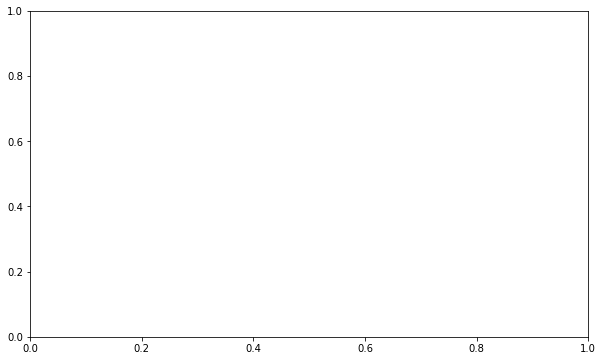

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'result_df' is already defined

# Create the box and whisker plot for both 'Mean' and 'Std Dev'
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Set up the axes for the plot
ax = plt.gca()

# Create the box and whisker plot for 'Mean'
ax.boxplot(result_df['Mean'], positions=result_df.index - 0.2, vert=False, widths=0.2, showfliers=False)

# Create the box and whisker plot for 'Std Dev'
ax.boxplot(result_df['Std Dev'], positions=result_df.index + 0.2, vert=False, widths=0.2, showfliers=False)

# Add markers for maximum and upper/lower bounds
ax.scatter(result_df['Max'], result_df.index, color='red', marker='o', label='Max')
ax.scatter(result_df['Upper Bound'], result_df.index, color='green', marker='x', label='Upper Bound')
ax.scatter(result_df['Lower Bound'], result_df.index, color='blue', marker='x', label='Lower Bound')

# Set the title and labels for the axes
plt.title('Box and Whisker Plot - Mean and Std Dev by Year', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Adjust the y-axis ticks and labels to show years
plt.yticks(result_df.index, result_df.index)

# Show the legend for the markers
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'AMWI'

# Convert index to datetime
AMWI.index = pd.to_datetime(AMWI.index)

# Find the first dates when each column value is greater than 0.075
first_dates = AMWI.apply(lambda x: AMWI.index[x > 0.07].min())

# Calculate the count of available images after the first contamination for each column
count_available_images = AMWI.apply(lambda x: x.loc[x.first_valid_index():].notnull().sum())

# Calculate the percentage of times each water body shows up as contaminated after the first contamination
total_dates = len(AMWI.index)
total_counts = count_available_images - 1  # Exclude the first contamination

percentage_contaminated = (total_counts / total_dates) * 100

# Create a new DataFrame combining the first dates, count of available images, and the percentage of contamination after the first contamination
result = pd.DataFrame({'First Date': first_dates, 'Count Available Images': total_counts, 'Percentage Contaminated': percentage_contaminated})

#print(result)
result

,First Date,Count Available Images,Percentage Contaminated
Horlivka1,2020-04-09,58,75.324675
Horlivka2,2018-08-26,58,75.324675
Illinka,2018-05-29,58,75.324675
Zolote,2014-08-15,36,46.753247
Bokovo-Platove,2014-04-25,37,48.051948
Ivanopillya,2014-05-18,20,25.974026
Molochnyy,2014-07-30,58,75.324675
Horlivka3,2018-08-26,58,75.324675
Zemlyanky,2019-06-10,60,77.922078
NEDonetsk,2014-05-18,60,77.922078


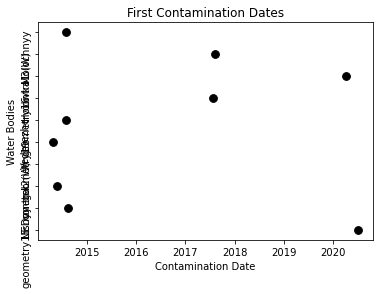

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming result is your DataFrame with water bodies as index and 'First Date' column

# Convert the 'First Date' column to datetime objects
result['First Date'] = pd.to_datetime(result['First Date'])

# Select a random sample of 10 water bodies
sample_water_bodies = result.sample(n=10)

# Plot the first contamination dates as scatter points
plt.scatter(sample_water_bodies['First Date'], sample_water_bodies.index, label='First Contamination Date',
            color='black', marker='o', s=60)

# Set the x-axis label
plt.xlabel('Contamination Date')

# Set the y-axis label
plt.ylabel('Water Bodies')

# Rotate y-axis labels by 90 degrees
plt.yticks(rotation=90)

# Add a title
plt.title('First Contamination Dates')

# Display the plot
plt.show()


In [50]:
Buffer = pd.read_csv(r'C:\Users\jonat\OneDrive\Documents\Diss\buffers.csv',sep=',', on_bad_lines='skip')


In [51]:
Buffer

,Buffer2,Buffer5,Buffer10,Buffer20
0,Horlivka1,Horlivka1,Horlivka1,Horlivka1
1,Horlivka2,Horlivka2,Horlivka2,Horlivka2
2,Horlivka3,Illinka,Illinka,Illinka
3,geometry7,Horlivka3,Molochnyy,Ivanopillya
4,Luhan,geometry7,Horlivka3,Molochnyy
5,geometry18,Luhan,geometry7,Horlivka3
6,control1 (W),geometry18,Luhan,Zemlyanky
7,control3(W),control1 (W),Dacha,Vedmezhe
8,NaN,control3(W),geometry18,geometry7
9,NaN,NaN,control1 (W),Luhan


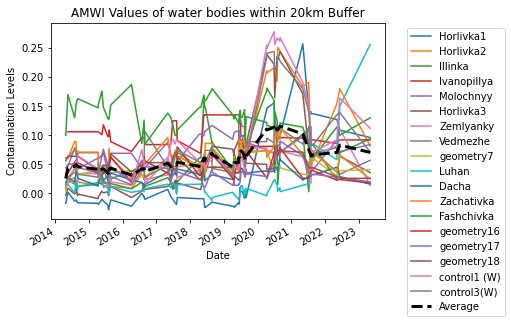

In [52]:
water_bodies_subset = Buffer['Buffer20'].tolist()

water_bodies_subset = [x for x in water_bodies_subset if pd.notna(x)]

# Select the subset of water bodies from the first DataFrame
subset_df_AMWI = AMWI[water_bodies_subset]


# Forward fill NaN values in the subset DataFrame
subset_df_AMWI = subset_df_AMWI.ffill()

# Plot the contamination levels over time
subset_df_AMWI.plot()
average = subset_df_AMWI.mean(axis=1)
plt.plot(subset_df_AMWI.index, average, '--', label='Average', linewidth=3, color='black')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Contamination Levels')
plt.title('AMWI Values of water bodies within 20km Buffer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


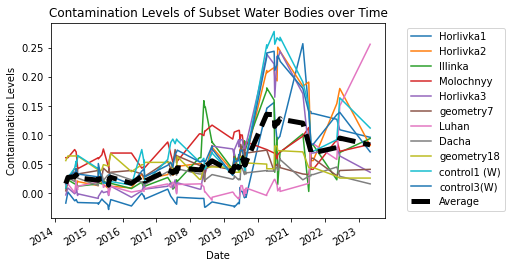

In [53]:
water_bodies_subset = Buffer['Buffer10'].tolist()

water_bodies_subset = [x for x in water_bodies_subset if pd.notna(x)]

# Select the subset of water bodies from the first DataFrame
subset_df_AMWI = AMWI[water_bodies_subset]


# Forward fill NaN values in the subset DataFrame
subset_df_AMWI = subset_df_AMWI.ffill()

# Plot the contamination levels over time
subset_df_AMWI.plot()
average = subset_df_AMWI.mean(axis=1)
plt.plot(subset_df_AMWI.index, average, '--', label='Average', linewidth=5, color='black')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Contamination Levels')
plt.title('Contamination Levels of Subset Water Bodies over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


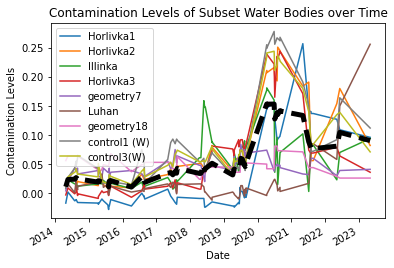

In [54]:
water_bodies_subset = Buffer['Buffer5'].tolist()

water_bodies_subset = [x for x in water_bodies_subset if pd.notna(x)]

# Select the subset of water bodies from the first DataFrame
subset_df_AMWI = AMWI[water_bodies_subset]


# Forward fill NaN values in the subset DataFrame
subset_df_AMWI = subset_df_AMWI.ffill()

# Plot the contamination levels over time
subset_df_AMWI.plot()
average = subset_df_AMWI.mean(axis=1)

plt.plot(subset_df_AMWI.index, average, '--', label='Average', linewidth=5, color='black')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Contamination Levels')
plt.title('Contamination Levels of Subset Water Bodies over Time')

# Display the plot
plt.show()

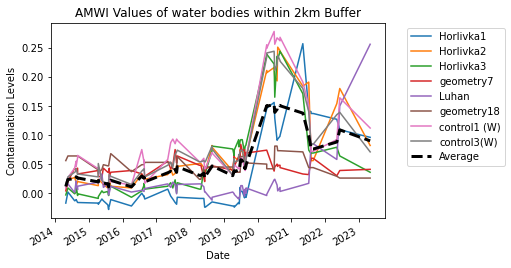

In [55]:
water_bodies_subset = Buffer['Buffer2'].tolist()

water_bodies_subset = [x for x in water_bodies_subset if pd.notna(x)]

# Select the subset of water bodies from the first DataFrame
subset_df_AMWI = AMWI[water_bodies_subset]


# Forward fill NaN values in the subset DataFrame
subset_df_AMWI = subset_df_AMWI.ffill()

# Plot the contamination levels over time
subset_df_AMWI.plot()
average = subset_df_AMWI.mean(axis=1)

plt.plot(subset_df_AMWI.index, average, '--', label='Average', linewidth=3, color='black')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Contamination Levels')
plt.title('AMWI Values of water bodies within 2km Buffer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Display the plot
plt.show()

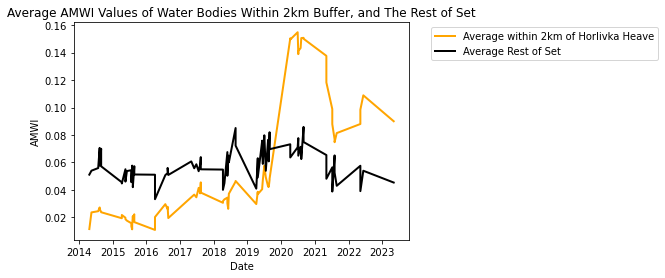

In [67]:
water_bodies_subset = Buffer['Buffer2'].dropna().tolist()

# Select the subset of water bodies from the "AMWI" DataFrame
subset_df_AMWI = AMWI[water_bodies_subset]

# Calculate the average contamination levels across time for the subset
subset_df_AMWI_interpolated = subset_df_AMWI.interpolate()

# Calculate the average contamination levels across time for the subset
average_subset = subset_df_AMWI_interpolated.mean(axis=1)

# Plot the average contamination levels over time for the subset
plt.plot(subset_df_AMWI.index, average_subset, label='Average within 2km of Horlivka Heave', linewidth=2, color='orange')

# Select the rest of the water bodies from the "AMWI" DataFrame
rest_df_AMWI = AMWI.drop(water_bodies_subset, axis=1)

# Calculate the average contamination levels across time for the rest
average_rest = rest_df_AMWI.mean(axis=1)

# Plot the average contamination levels over time for the rest
plt.plot(rest_df_AMWI.index, average_rest,label='Average Rest of Set', linewidth=2, color='black')

# Add labels, legend, and title to the plot
plt.xlabel('Date')
plt.ylabel('AMWI')
plt.title('Average AMWI Values of Water Bodies Within 2km Buffer, and The Rest of Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()